**Table of contents**<a id='toc0_'></a>    
- [Table of Content](#toc1_)    
  - [About the dataset](#toc1_1_)    
  - [Feature Description](#toc1_2_)    
  - [Data Preprocessing](#toc1_3_)    
    - [Data Types and Summary Statistics](#toc1_3_1_)    
    - [Identifying Target Feature](#toc1_3_2_)    
    - [Data Cleaning](#toc1_3_3_)    
      - [Handling Missing Values](#toc1_3_3_1_)    
      - [Handling Duplicate Values](#toc1_3_3_2_)    
      - [Outlier Detection and Treatment](#toc1_3_3_3_)    
      - [Handling Categorical feature](#toc1_3_3_4_)    
  - [Feature Extraction(statistical feature)](#toc1_4_)    
  - [Normalization](#toc1_5_)    
  - [feature selection(Artificial ecosystem-based optimization)](#toc1_6_)    
  - [classification and prediction](#toc1_7_)    
    - [Base model](#toc1_7_1_)    
    - [Hyperparamater Tuning](#toc1_7_2_)    
    - [Plots](#toc1_7_3_)    
    - [Best Model](#toc1_7_4_)    
  - [Saving and Loading Model](#toc1_8_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc1_'></a>[Table of Content](#toc0_)

## <a id='toc1_1_'></a>[About the dataset](#toc0_)
The effectiveness of the cancer prediction system helps individuals assess their lung cancer risk at a low cost and take appropriate actions based on their risk status. The dataset is collected from an online lung cancer prediction system.

## <a id='toc1_2_'></a>[Feature Description](#toc0_)

1. **Gender**: Patient's gender (M for Male, F for Female).  
2. **Age**: Age of the patient (numerical).  
3. **Smoking**: Smoking status (1 = No, 2 = Yes).  
4. **Yellow Fingers**: Presence of yellow fingers (1 = No, 2 = Yes).  
5. **Anxiety**: Patient suffers from anxiety (1 = No, 2 = Yes).  
6. **Peer Pressure**: Influence of peer pressure (1 = No, 2 = Yes).  
7. **Chronic Disease**: Presence of chronic diseases (1 = No, 2 = Yes).  
8. **Fatigue**: Experience of fatigue (1 = No, 2 = Yes).  
9. **Allergy**: Allergy history (1 = No, 2 = Yes).  
10. **Wheezing**: Wheezing symptoms (1 = No, 2 = Yes).  
11. **Alcohol**: Alcohol consumption (1 = No, 2 = Yes).  
12. **Coughing**: Coughing symptoms (1 = No, 2 = Yes).  
13. **Shortness of Breath**: Presence of shortness of breath (1 = No, 2 = Yes).  
14. **Swallowing Difficulty**: Difficulty in swallowing (1 = No, 2 = Yes).  
15. **Chest Pain**: Experiencing chest pain (1 = No, 2 = Yes).  
16. **Lung Cancer**: Lung cancer diagnosis (No = No lung cancer, Yes = Lung cancer).

## <a id='toc1_3_'></a>[Data Preprocessing](#toc0_)

In [291]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Necessary imports
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, f1_score, classification_report, roc_curve, auc, accuracy_score
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE  # Recursive Feature Elimination
from sklearn.linear_model import Ridge, Lasso, LinearRegression, ElasticNet 

# Increase display options for better visibility
pd.set_option('display.max_colwidth', None)

from IPython.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [ ]:
df = pd.read_csv('/Users/akashvs/Documents/datasets/lung_cancer.csv')
df                                                                         

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES


### <a id='toc1_3_1_'></a>[Data Types and Summary Statistics](#toc0_)

In [293]:
df.columns = ['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE', 'ALLERGY', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER']

In [294]:
df.shape

(309, 16)

In [295]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [296]:
# descriptive statistics about numerical features 
df.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [297]:
# descriptive statistics about categorical features 
df.describe(include='object')

,GENDER,LUNG_CANCER
count,309,309
unique,2,2
top,M,YES
freq,162,270


Here two Genders(Male and Female) are present but we do not have data about transgender people so in the future try to get datas about them as well to make our model more diverse

In [298]:
def unique_values(col):
    print(f'Number of unique values of {col} -----> {df[col].nunique()}')
    print(f'List of unique values = {df[col].unique()}')
    print('----------------------------------------------------------------')


cols = df.columns
for i in cols:
    unique_values(i)

Number of unique values of GENDER -----> 2
List of unique values = ['M' 'F']
----------------------------------------------------------------
Number of unique values of AGE -----> 39
List of unique values = [69 74 59 63 75 52 51 68 53 61 72 60 58 48 57 44 64 21 65 55 62 56 67 77
 70 54 49 73 47 71 66 76 78 81 79 38 39 87 46]
----------------------------------------------------------------
Number of unique values of SMOKING -----> 2
List of unique values = [1 2]
----------------------------------------------------------------
Number of unique values of YELLOW_FINGERS -----> 2
List of unique values = [2 1]
----------------------------------------------------------------
Number of unique values of ANXIETY -----> 2
List of unique values = [2 1]
----------------------------------------------------------------
Number of unique values of PEER_PRESSURE -----> 2
List of unique values = [1 2]
----------------------------------------------------------------
Number of unique values of CHRONIC DISE

- 'AGE' is the only numerical feature
- Every other features are binary values

### <a id='toc1_3_2_'></a>[Identifying Target Feature](#toc0_)

In [299]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


'LUNG_CANCER' column is the target feature as it shows whether the patient has lung cancer or not.

### <a id='toc1_3_3_'></a>[Data Cleaning](#toc0_)
#### <a id='toc1_3_3_1_'></a>[Handling Missing Values](#toc0_)

In [300]:
df.isnull().sum()/len(df)*100

GENDER                   0.0
AGE                      0.0
SMOKING                  0.0
YELLOW_FINGERS           0.0
ANXIETY                  0.0
PEER_PRESSURE            0.0
CHRONIC DISEASE          0.0
FATIGUE                  0.0
ALLERGY                  0.0
WHEEZING                 0.0
ALCOHOL CONSUMING        0.0
COUGHING                 0.0
SHORTNESS OF BREATH      0.0
SWALLOWING DIFFICULTY    0.0
CHEST PAIN               0.0
LUNG_CANCER              0.0
dtype: float64

There is no missing values present in the data

#### <a id='toc1_3_3_2_'></a>[Handling Duplicate Values](#toc0_)

In [301]:
df[df.duplicated()]

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
99,M,56,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
100,M,58,2,1,1,1,1,1,2,2,2,2,1,1,1,YES
117,F,51,2,2,2,2,1,2,2,1,1,1,2,2,1,YES
199,F,55,2,1,1,2,2,2,2,2,2,1,1,2,2,YES
212,M,58,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
223,M,63,2,2,2,1,2,2,2,2,1,1,2,1,1,YES
256,M,60,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
275,M,64,2,2,2,2,2,1,1,1,2,1,1,2,2,YES
284,M,58,2,2,2,2,2,1,1,1,2,1,1,2,2,YES
285,F,58,2,2,2,2,1,2,1,1,1,2,2,2,1,YES


In [302]:
df.drop_duplicates(inplace=True)

Duplicate rows are deleted

#### <a id='toc1_3_3_3_'></a>[Outlier Detection and Treatment](#toc0_)

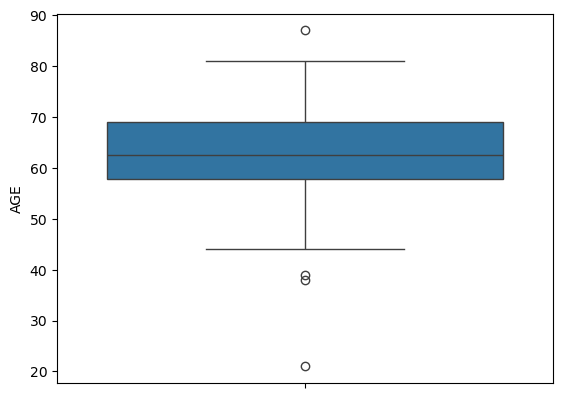

In [303]:
sns.boxplot(df['AGE'])
plt.show()

Outlier is present in the data lets try to find the actual value so we can decide whether to treat the ouliers or not

In [304]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['AGE'].quantile(0.25)
Q3 = df['AGE'].quantile(0.75)
IQR = Q3 - Q1

# Define the outlier range
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count outliers
outliers = df[(df['AGE'] < lower_bound) | (df['AGE'] > upper_bound)]
outlier_count = len(outliers)

# Outliers
actual_outliers = df[(df['AGE'] < lower_bound) | (df['AGE'] > upper_bound)]
actual_outliers = actual_outliers.loc[:, ['AGE']]

# Calculate percentage of outliers
outlier_percentage = (outlier_count / len(df)) * 100

print(f'Outlier percentage for AGE = {outlier_percentage:.2f} %')
actual_outliers

Outlier percentage for AGE = 1.45 %


,AGE
22,21
238,38
261,39
277,87


The outliers we found from interquartile range are not actual outlier, because humans can have age of 21 and 38 it may be devated from the mean but it is still a valid data so we don't need to do outlier treatment.

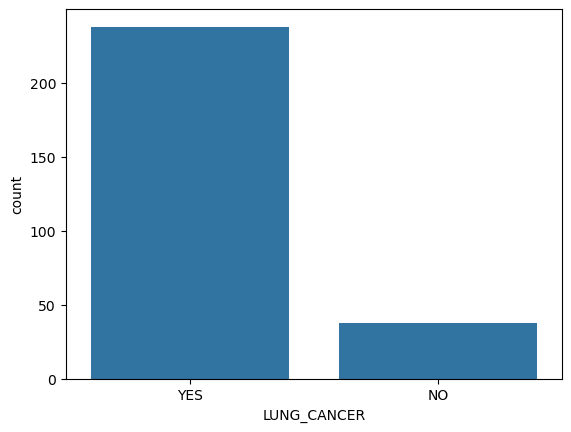

In [305]:
sns.countplot(x = df['LUNG_CANCER'])
plt.show()

Convert "LUNG_CANCER" Present(YES) to 0 and "Absence"(NO) to 1

#### <a id='toc1_3_3_4_'></a>[Handling Categorical feature](#toc0_)

In [306]:
df['LUNG_CANCER'] = df['LUNG_CANCER'].map({'YES': 0, 'NO': 1})
df['GENDER'] = df['GENDER'].map({'M': 0, 'F': 1})

In [307]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,0,69,1,2,2,1,1,2,1,2,2,2,2,2,2,0
1,0,74,2,1,1,1,2,2,2,1,1,1,2,2,2,0
2,1,59,1,1,1,2,1,2,1,2,1,2,2,1,2,1
3,0,63,2,2,2,1,1,1,1,1,2,1,1,2,2,1
4,1,63,1,2,1,1,1,1,1,2,1,2,2,1,1,1


In [308]:
# Splitting dataset
X = df.drop('LUNG_CANCER', axis=1)
y = df['LUNG_CANCER']

## <a id='toc1_4_'></a>[Feature Extraction(statistical feature)](#toc0_)

In [309]:
X['MEAN_SCORE'] = X[X.columns].mean(axis=1)
X['MEDIAN_SCORE'] = X[X.columns].median(axis=1)
X['STD_DEVATION_SCORE'] = X[X.columns].std(axis=1)

In [ ]:
X

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,MEAN_SCORE,MEDIAN_SCORE,STD_DEVATION_SCORE
0,0,69,1,2,2,1,1,2,1,2,2,2,2,2,2,6.066667,2.0,16.325782
1,0,74,2,1,1,1,2,2,2,1,1,1,2,2,2,6.266667,2.0,17.567845
2,1,59,1,1,1,2,1,2,1,2,1,2,2,1,2,5.266667,1.5,13.942486
3,0,63,2,2,2,1,1,1,1,1,2,1,1,2,2,5.466667,1.5,14.930134
4,1,63,1,2,1,1,1,1,1,2,1,2,2,1,1,5.400000,1.0,14.949543
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,1,59,1,2,2,2,1,1,2,2,1,2,1,2,1,5.333333,2.0,13.918941
280,1,59,2,1,1,1,2,2,2,1,1,1,2,1,1,5.200000,1.0,13.966483
281,0,55,2,1,1,1,1,2,2,1,1,1,2,1,2,4.866667,1.0,13.018748
282,0,46,1,2,2,1,1,1,1,1,1,1,1,2,2,4.200000,1.0,10.857134


## <a id='toc1_5_'></a>[Normalization](#toc0_)

In [311]:
np.random.seed(42)
# Splitting dataset for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [312]:

# MinMaxScaling
scaler = MinMaxScaler()

# Fit on X_train only and transform X_train
X_train[['AGE', 'MEAN_SCORE', 'MEDIAN_SCORE', 'STD_DEVATION_SCORE']] = scaler.fit_transform(X_train[['AGE', 'MEAN_SCORE', 'MEDIAN_SCORE', 'STD_DEVATION_SCORE']])

# Use the same scaler to transform X_test
X_test[['AGE', 'MEAN_SCORE', 'MEDIAN_SCORE', 'STD_DEVATION_SCORE']] = scaler.transform(X_test[['AGE', 'MEAN_SCORE', 'MEDIAN_SCORE', 'STD_DEVATION_SCORE']])

In [ ]:
X_train.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,MEAN_SCORE,MEDIAN_SCORE,STD_DEVATION_SCORE
263,1,0.673469,1,2,1,1,2,2,2,2,1,2,2,1,1,0.695652,1.0,0.669388
187,0,0.346939,2,1,1,1,1,2,1,1,1,1,1,1,1,0.217391,0.0,0.354718
214,1,0.469388,2,2,2,2,1,2,1,1,1,2,2,2,2,0.521739,1.0,0.464131
82,1,0.489796,2,2,2,2,2,1,2,2,2,1,1,2,2,0.565217,1.0,0.482958
29,0,0.346939,1,2,1,1,1,2,1,2,2,2,2,1,1,0.304348,0.5,0.349106


## <a id='toc1_6_'></a>[feature selection(Artificial ecosystem-based optimization)](#toc0_)

In [314]:
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from mealpy.utils.space import BinaryVar
from mealpy.system_based.AEO import OriginalAEO
from mealpy.utils.problem import Problem

# Define your fitness function
# Define your fitness function
# Define your fitness function
def fitness_function(solution):
    selected_features = [i for i, val in enumerate(solution) if val > 0.5]
    
    # Enforce at least 7 features
    if len(selected_features) < 7:
        return 1e6  # Penalize heavily if fewer than 7 features are selected
    
    # Correct the way to select features from DataFrame
    X_selected = X.iloc[:, selected_features]  # Use iloc for selecting columns by index
    model = LogisticRegression(C=1, max_iter=1000)
    scores = cross_val_score(model, X_selected, y, scoring="f1", cv=5)
    return -np.mean(scores)  # Minimize negative F1 score


# Define the problem class inheriting from Problem
class MyProblem(Problem):
    def __init__(self, fit_func, bounds, minmax):
        self.fit_func = fit_func
        self.minmax = minmax
        # Call the parent constructor to initialize bounds
        super().__init__(bounds, minmax)

    def obj_func(self, x):
        return self.fit_func(x)

# Define the bounds using BinaryVar, where each feature is either selected or not
bounds = [BinaryVar() for _ in range(X_train.shape[1])]

# Define problem with bounds using BinaryVar
problem = MyProblem(
    fit_func=fitness_function,
    bounds=bounds,  # Proper bounds setting
    minmax="min"  # Minimize negative F1 score
)

# Initialize the optimizer
optimizer = OriginalAEO(epoch=20, pop_size=60)

# Run the optimizer
best_agent = optimizer.solve(problem)

2024/12/09 02:36:35 PM, INFO, mealpy.system_based.AEO.OriginalAEO: Solving single objective optimization problem.
2024/12/09 02:36:39 PM, INFO, mealpy.system_based.AEO.OriginalAEO: >>>Problem: P, Epoch: 1, Current best: -0.691273432449903, Global best: -0.691273432449903, Runtime: 2.00160 seconds
2024/12/09 02:36:41 PM, INFO, mealpy.system_based.AEO.OriginalAEO: >>>Problem: P, Epoch: 2, Current best: -0.7422021116138763, Global best: -0.7422021116138763, Runtime: 1.86009 seconds
2024/12/09 02:36:42 PM, INFO, mealpy.system_based.AEO.OriginalAEO: >>>Problem: P, Epoch: 3, Current best: -0.7422021116138763, Global best: -0.7422021116138763, Runtime: 1.64649 seconds
2024/12/09 02:36:44 PM, INFO, mealpy.system_based.AEO.OriginalAEO: >>>Problem: P, Epoch: 4, Current best: -0.7422021116138763, Global best: -0.7422021116138763, Runtime: 1.54428 seconds
2024/12/09 02:36:45 PM, INFO, mealpy.system_based.AEO.OriginalAEO: >>>Problem: P, Epoch: 5, Current best: -0.7422021116138763, Global best: -0.7

In [340]:
best_fitness = best_agent.target.objectives[0]  # Access the first objective (fitness)
best_solution = best_agent.solution 
print(f"Best Features: {best_solution}, Fitness: {-best_fitness}")

Best Features: [0 0 1 0 1 1 1 1 0 1 1 1 0 0 1 0 1 0], Fitness: 0.7422021116138763


In [341]:
# Get the selected features from the best solution
selected_features = np.array(best_solution, dtype=bool)
print("Selected Features:")
X_train.columns[selected_features]

Selected Features:


Index(['SMOKING', 'ANXIETY', 'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE',
       'WHEEZING', 'ALCOHOL CONSUMING', 'COUGHING', 'CHEST PAIN',
       'MEDIAN_SCORE'],
      dtype='object')

In [342]:
selected_features

array([False, False,  True, False,  True,  True,  True,  True, False,
        True,  True,  True, False, False,  True, False,  True, False])

In [ ]:
X_train_selected = X_train.iloc[:, selected_features]
X_test_selected = X_test.iloc[:, selected_features]

X_train_selected

,SMOKING,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,WHEEZING,ALCOHOL CONSUMING,COUGHING,CHEST PAIN,MEDIAN_SCORE
263,1,1,1,2,2,2,1,2,1,1.0
187,2,1,1,1,2,1,1,1,1,0.0
214,2,2,2,1,2,1,1,2,2,1.0
82,2,2,2,2,1,2,2,1,2,1.0
29,1,1,1,1,2,2,2,2,1,0.5
...,...,...,...,...,...,...,...,...,...,...
168,1,1,2,2,2,2,1,1,2,1.0
177,2,1,1,1,2,2,2,2,1,0.5
104,2,2,2,1,2,1,1,2,2,1.0
54,1,1,2,2,2,1,2,2,1,1.0


## <a id='toc1_7_'></a>[classification and prediction](#toc0_)

### <a id='toc1_7_1_'></a>[Base model](#toc0_)

In [344]:
# Train a model with the selected features
base_model = LogisticRegression(max_iter=1000)
base_model.fit(X_train_selected, y_train)
y_pred = base_model.predict(X_test_selected)

# Evaluate the final modelauc_score = accuracy_score(y_test, y_pred)
final_f1 = f1_score(y_test, y_pred)
auc_score = accuracy_score(y_test, y_pred)
print(f"F1 Score: {final_f1:.4f}")
print(f"AUCCURACY Score: {auc_score:.4f}")

F1 Score: 0.4444
AUCCURACY Score: 0.8795


Index(['AGE', 'YELLOW_FINGERS', 'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ',
       'ALCOHOL CONSUMING', 'COUGHING', 'SWALLOWING DIFFICULTY', 'CHEST PAIN',
       'MEAN_SCORE', 'MEDIAN_SCORE'],
      dtype='object')

In [ ]:
b = ['AGE', 'YELLOW_FINGERS', 'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALCOHOL CONSUMING', 'COUGHING', 'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'MEAN_SCORE', 'MEDIAN_SCORE']

### <a id='toc1_7_2_'></a>[Hyperparamater Tuning](#toc0_)

In [378]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, f1_score, classification_report
import matplotlib.pyplot as plt

# Ensure X_train_selected and X_test_selected contain selected features from the AEO process

# Step 1: Define pipelines for all models
pipelines = {
    'LogisticRegression': LogisticRegression(max_iter=500),
    'SVC': SVC(probability=True),
    'KNN': KNeighborsClassifier(),
    'DecisionTree': DecisionTreeClassifier()
}

# Step 2: Define hyperparameters
param_grids = {
    'LogisticRegression': {'C': [0.1, 1, 10]},
    'SVC': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
    'KNN': {'n_neighbors': [3, 5, 7], 'metric': ['euclidean', 'manhattan']},
    'DecisionTree': {'max_depth': [3, 5, 7, None], 'min_samples_split': [2, 5, 10]}
}

# Step 3: Perform hyperparameter tuning and evaluate models
results = []
for model_name, model in pipelines.items():
    print(f"Tuning hyperparameters for {model_name}...")
    grid_search = GridSearchCV(model, param_grids[model_name], cv=5, scoring='f1', n_jobs=-1)
    grid_search.fit(X_train_selected, y_train)

    # Best Model Evaluation
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test_selected)
    y_proba = (
        best_model.predict_proba(X_test_selected)[:, 1]
        if hasattr(best_model, "predict_proba")
        else best_model.decision_function(X_test_selected)
    )

    # Metrics
    aucroc_score = roc_auc_score(y_test, y_proba)
    f1 = f1_score(y_test, y_pred)
    auc_score = accuracy_score(y_test, y_pred)
    print(f"{model_name} - Best Params: {grid_search.best_params_}, Test ROC-AUC: {aucroc_score:.4f}, Test F1: {f1:.4f}")
    results.append((model_name, aucroc_score, f1, auc_score, grid_search.best_params_))
results   
# Create a DataFrame from the results list
result_dataframe = pd.DataFrame(results, columns=['Model Used', 'AUC-ROC', 'F1 Score', 'Auccuracy', 'Best Hyperparameters'])

Tuning hyperparameters for LogisticRegression...
LogisticRegression - Best Params: {'C': 1}, Test ROC-AUC: 0.9508, Test F1: 0.4444
Tuning hyperparameters for SVC...
SVC - Best Params: {'C': 1, 'kernel': 'linear'}, Test ROC-AUC: 0.9596, Test F1: 0.7273
Tuning hyperparameters for KNN...
KNN - Best Params: {'metric': 'euclidean', 'n_neighbors': 7}, Test ROC-AUC: 0.9659, Test F1: 0.7000
Tuning hyperparameters for DecisionTree...
DecisionTree - Best Params: {'max_depth': 3, 'min_samples_split': 2}, Test ROC-AUC: 0.9804, Test F1: 0.6250


In [ ]:
# Display the result dataframe
results = [row[:-1] for row in results]
result_dataframe.set_index('Model Used')

,AUC-ROC,F1 Score,Auccuracy,Best Hyperparameters
Model Used,,,,
LogisticRegression,0.950758,0.444444,0.879518,{'C': 1}
SVC,0.959596,0.727273,0.927711,"{'C': 1, 'kernel': 'linear'}"
KNN,0.965909,0.700000,0.927711,"{'metric': 'euclidean', 'n_neighbors': 7}"
DecisionTree,0.980429,0.625000,0.927711,"{'max_depth': 3, 'min_samples_split': 2}"


### <a id='toc1_7_3_'></a>[Plots](#toc0_)

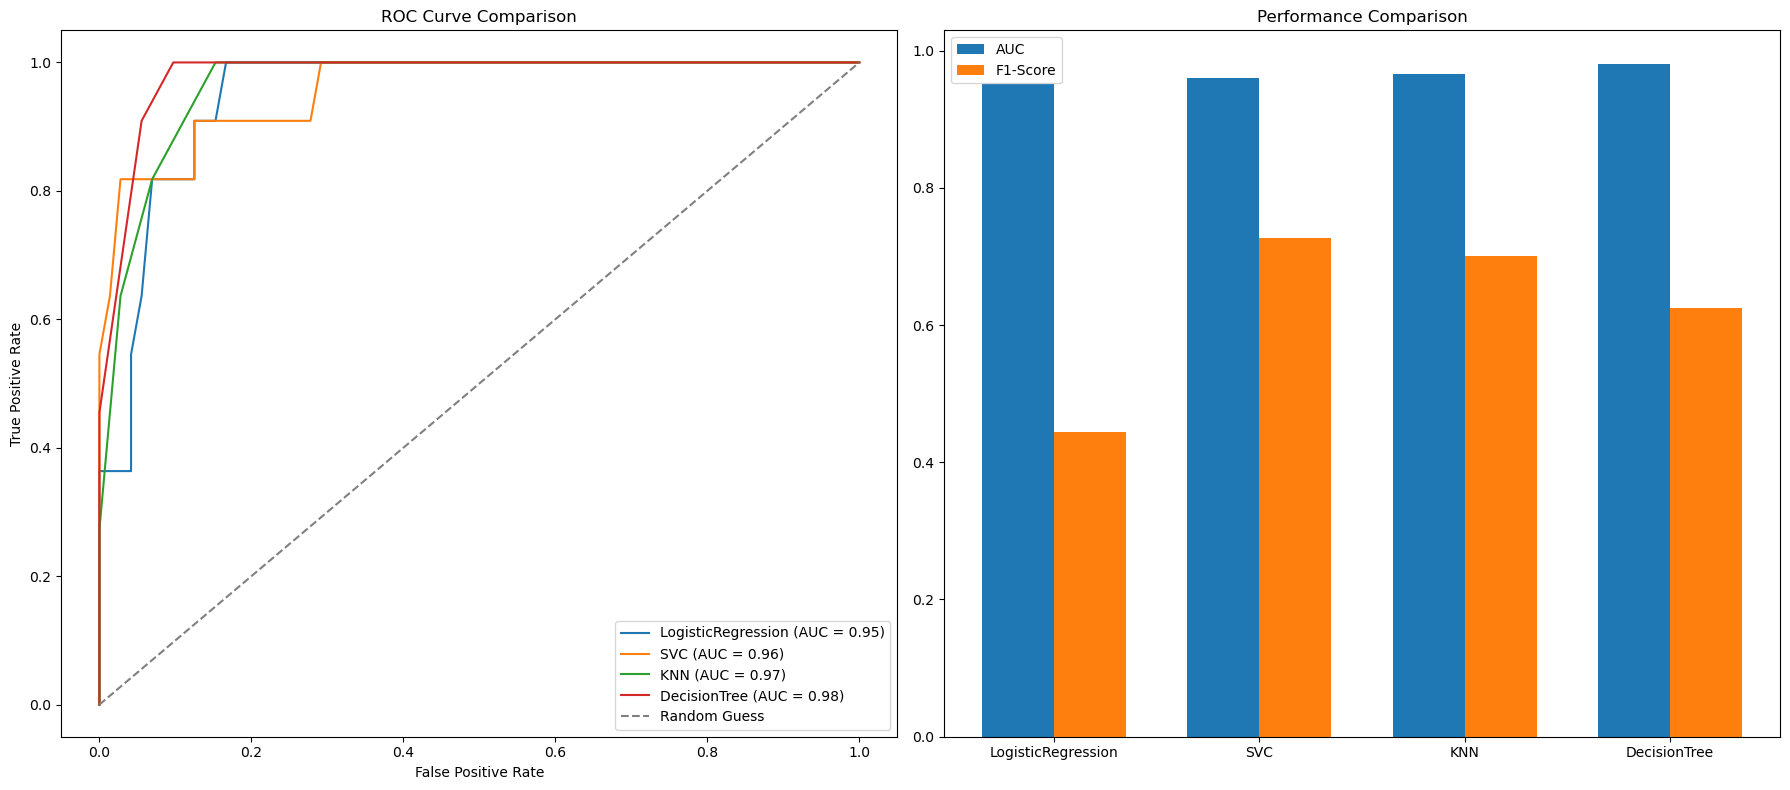

In [380]:
from sklearn.metrics import roc_curve

fig, ax = plt.subplots(1, 2, figsize=(18, 8))

# Plot ROC Curves for all models
for model_name, model in pipelines.items():
    # Get the best model from GridSearchCV
    grid_search = GridSearchCV(model, param_grids[model_name], cv=5, scoring='roc_auc', n_jobs=-1)
    grid_search.fit(X_train_selected, y_train)
    best_model = grid_search.best_estimator_

    # Compute ROC curve
    if hasattr(best_model, "predict_proba"):
        y_proba = best_model.predict_proba(X_test_selected)[:, 1]
    else:
        y_proba = best_model.decision_function(X_test_selected)

    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc_score = roc_auc_score(y_test, y_proba)
    ax[0].plot(fpr, tpr, label=f"{model_name} (AUC = {auc_score:.2f})")

# Step 4: Plot performance comparison
model_names, auc_scores, f1_scores, _ = zip(*results)
# Add Random Guess Line
ax[0].plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
ax[0].set_title("ROC Curve Comparison")
ax[0].set_xlabel("False Positive Rate")
ax[0].set_ylabel("True Positive Rate")
ax[0].legend()

# Bar Plot for Performance Comparison
index = np.arange(len(model_names))
bar_width = 0.35
ax[1].bar(index, auc_scores, bar_width, label="AUC")
ax[1].bar(index + bar_width, f1_scores, bar_width, label="F1-Score")
ax[1].set_xticks(index + bar_width / 2)
ax[1].set_xticklabels(model_names)
ax[1].set_title("Performance Comparison")
ax[1].legend()

plt.tight_layout()
plt.show()


Here you can see **SVC** works better than other algorithms 

### <a id='toc1_7_4_'></a>[Best Model](#toc0_)

In [ ]:
# Train the model with the selected features
X_train_selected = X_train.loc[:, selected_features]
X_test_selected = X_test.loc[:, selected_features]

best_model = SVC(C=10, kernel='rbf', probability=True)
best_model.fit(X_train_selected, y_train)

# Make predictions
y_pred = best_model.predict(X_test_selected)
y_proba = best_model.predict_proba(X_test_selected)[:, 1]

# Evaluate the final model
final_f1 = f1_score(y_test, y_pred)
aucroc_score = roc_auc_score(y_test, y_proba)
auc_score = accuracy_score(y_test, y_pred)

print(f"F1 Score: {final_f1:.4f}")
print(f"AUC-ROC Score: {aucroc_score:.4f}")
print(f"Accuracy Score: {auc_score:.4f}")

F1 Score: 0.8571
AUC-ROC Score: 0.9886
Accuracy Score: 0.9639


## <a id='toc1_8_'></a>[Saving and Loading Model](#toc0_)

In [383]:
import joblib

# selected features 
selected_features = [
    'SMOKING', 'ANXIETY', 'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE',
    'WHEEZING', 'ALCOHOL CONSUMING', 'COUGHING', 'CHEST PAIN', 'MEDIAN_SCORE'
]

# Define feature ranges for metadata
feature_ranges = {
    'SMOKING': [0, 1],
    'ANXIETY': [0, 1],
    'PEER_PRESSURE': [0, 1],
    'CHRONIC DISEASE': [0, 1],
    'FATIGUE': [0, 1],
    'WHEEZING': [0, 1],
    'ALCOHOL CONSUMING': [0, 1],
    'COUGHING': [0, 1],
    'CHEST PAIN': [0, 1],
    'MEDIAN_SCORE': [0, 100],  
}


# Save the model and metadata
metadata = {
    "selected_features": selected_features,
    "feature_ranges": feature_ranges,
    "model_type": "SVC",
    "hyperparameters": {"C": 10, "kernel": "rbf"}
}

# Save model and metadata with joblib
joblib.dump(best_model, "final_model_svc.pkl")
joblib.dump(metadata, "model_metadata.pkl")

print("Model and metadata saved successfully!")

Model and metadata saved successfully!


In [384]:
model_metadata = joblib.load("model_metadata.pkl")
print(model_metadata)

{'selected_features': ['SMOKING', 'ANXIETY', 'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE', 'WHEEZING', 'ALCOHOL CONSUMING', 'COUGHING', 'CHEST PAIN', 'MEDIAN_SCORE'], 'feature_ranges': {'SMOKING': [0, 1], 'ANXIETY': [0, 1], 'PEER_PRESSURE': [0, 1], 'CHRONIC DISEASE': [0, 1], 'FATIGUE': [0, 1], 'WHEEZING': [0, 1], 'ALCOHOL CONSUMING': [0, 1], 'COUGHING': [0, 1], 'CHEST PAIN': [0, 1], 'MEDIAN_SCORE': [0, 100]}, 'model_type': 'SVC', 'hyperparameters': {'C': 10, 'kernel': 'rbf'}}


In [385]:
# Predict with new data
def predict_new_data(new_data):
    """
    Make predictions using the saved model.
    
    Parameters:
        new_data (pd.DataFrame): New input data containing the selected features.

    Returns:
        dict: Predictions and probabilities.
    """
    # Load the saved model and metadata
    model = joblib.load("final_model_svc.pkl")
    
    # Check for missing features
    missing_features = [feature for feature in metadata["selected_features"] if feature not in new_data.columns]
    if missing_features:
        raise ValueError(f"Missing features in input data: {missing_features}")
    
    # Select only the required features and predict
    selected_data = new_data[metadata["selected_features"]]
    predictions = model.predict(selected_data)
    probabilities = model.predict_proba(selected_data)[:, 1]

    # with open("model_metadata.json", "r") as f:
    # metadata = json.load(f)
    # print("Expected feature names:", metadata["feature_names"])
    return {"predictions": predictions, "probabilities": probabilities}

In [387]:
# Example usage for new data
new_data = pd.DataFrame({
    'SMOKING': [1],
    'ANXIETY': [0],
    'PEER_PRESSURE': [1],
    'CHRONIC DISEASE': [0],
    'FATIGUE': [1],
    'WHEEZING': [0],
    'ALCOHOL CONSUMING': [1],
    'COUGHING': [1],
    'CHEST PAIN': [0],
    'MEDIAN_SCORE': [78]  # Example value
})

prediction_result = predict_new_data(new_data)
prediction = prediction_result['predictions']
print("Prediction for new data:")
if prediction[0] == 0:
    print('(Lung Cancer Detected) Consult Doctors immediately ')
else:
    print('No Lung Cancer Detected ')

Prediction for new data:
(Lung Cancer Detected) Consult Doctors immediately 
